In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn


In [8]:
# Reading the dataset
titanic = pd.read_csv('titanic.csv')

In [9]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,1
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,1
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,1
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333,0
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708,0


In [10]:
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000,887.000000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542,0.645998
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204,0.478480
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920,1.000000


In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
 8   Gender                   887 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.5+ KB


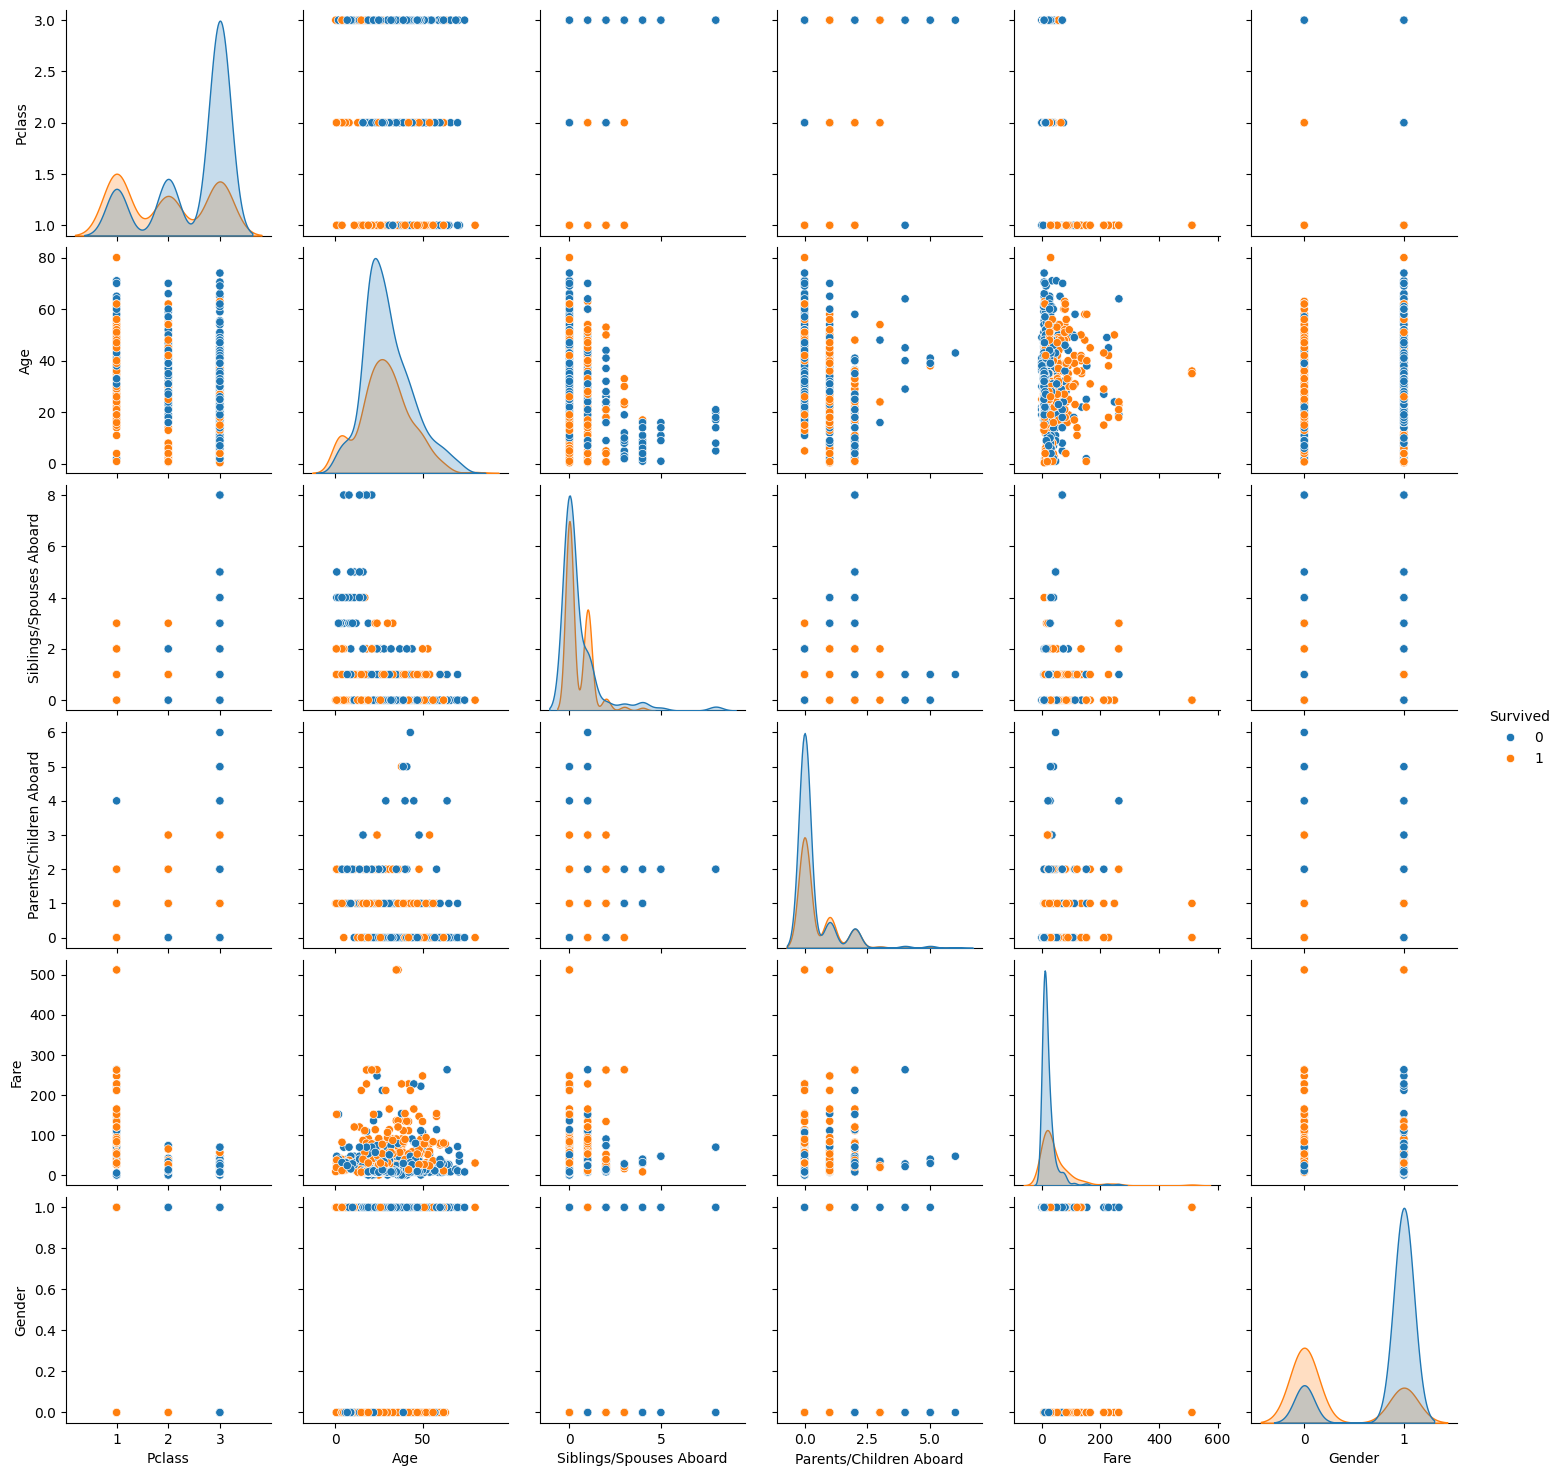

In [12]:
seaborn.pairplot(titanic, hue="Survived")

In [13]:
#категоризирую пол
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})

# #Создаю новый параметр Female size
# titanic['Female size'] = titanic[['Siblings/Spouses Aboard', 'Parents/Children Aboard']].sum(axis=1)

#определяю X как титаник без выживших и имени, потому что они не нужны, и y как выживших    
X, y =titanic.drop(['Survived', 'Name'], axis=1), titanic['Survived']

X.shape,y.shape

((887, 7), (887,))

In [14]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [16]:

# Initialize the SVM Classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train_scaled, y_train)


SVC()

In [17]:

# Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

In [18]:
scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=10, scoring='f1_macro')
scores

array([0.81478261, 0.76629361, 0.81794872, 0.9073913 , 0.8317173 ,
       0.86231416, 0.76094276, 0.78760684, 0.8405146 , 0.83300802])

In [19]:
scores.mean()

0.8222519927564745

In [20]:
# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.01, 0.1, 1, 'scale'],
}


In [22]:

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1) # f1_macro, f1 # , verbose=1, n_jobs=-1

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [23]:

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7865168539325843


In [24]:
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=10, scoring='accuracy', n_jobs=-1)
print(scores)
print(scores.mean())

[0.8028169  0.8028169  0.85915493 0.92957746 0.85915493 0.87323944
 0.77464789 0.83098592 0.84507042 0.81428571]
0.8391750503018109


In [25]:

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='f1_macro', n_jobs=-1) # f1_macro, f1 # , verbose=1, n_jobs=-1

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [26]:

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7865168539325843


In [27]:
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=10, scoring='f1_macro', n_jobs=-1)
print(scores)
print(scores.mean())

[0.81478261 0.76629361 0.81794872 0.9073913  0.8317173  0.86231416
 0.76094276 0.78760684 0.8405146  0.83300802]
0.8222519927564745


In [28]:

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='f1', n_jobs=-1) # f1_macro, f1 # , verbose=1, n_jobs=-1

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [29]:

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7865168539325843


In [30]:
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=10, scoring='f1', n_jobs=-1)
print(scores)
print(scores.mean())

[0.76       0.69387755 0.76923077 0.88       0.78431373 0.82352941
 0.7037037  0.73076923 0.81355932 0.79245283]
0.7751436544201591


In [32]:

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

conf_matrix

array([[99, 12],
       [26, 41]], dtype=int64)

In [33]:
print(class_report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       111
           1       0.77      0.61      0.68        67

    accuracy                           0.79       178
   macro avg       0.78      0.75      0.76       178
weighted avg       0.79      0.79      0.78       178

